## 样条回归及多元自适应回归样条
---
### 样条回归
* 样条回归将结合题一（摩托车事故mcycle数据集）进行阐述，多元自适应回归样条将结合题二（医疗费用预测(）进行阐述
* 概述：样条回归是一种非线性的回归模型，利用选定的控制节点连接起分段多项式曲线，然后拟合分段多项式曲线（样条曲线），可以较好的处理非线性关系的数据
* 样条回归将对如下的要点进行说明：
    1. **核心思想**——寻找合适的控制节点，连接形成分段多项式曲线，对多项式曲线进行最小二乘法确定最佳参数
    2. **具体过程**：首先使用分段函数确定控制节点(knot)，选取k个控制节点，$a_1,a_2,...,a_k,其中a_1<a_2<...<a_k$，则线性样条回归为:$$y=\beta_0+\beta_1x+w_1(x-a_1)_++w_2(x-a_2)_++...=w_k(x-a_k)_+$$可以写出设计矩阵$$G=\begin{bmatrix}1&x_1&(x_1-a_1)_+&...&(x_1-a_k)_+\\1&x_x&(x_2-a_1)_+&...&(x_2-a_k)_+\\.&.&.&&.\\.&.&.&&.\\.&.&.&&.\\1&x_n&(x_n-a_1)_+&...&(x_n-a_k)_+\end{bmatrix}$$令参数向量$$w=(\beta_0,\beta_1,w_1,w_2,...,w_k)^T$$则$$y=Gw$$使用最小二乘法可以求出最优的参数$$w=(G^TG)^{-1}G^Ty$$控制节点的选择影响模型的拟合性能，选取过多可能会造成过拟合，反之过少的节点会造成欠拟合，因此，引入惩罚的概念来控制节点数过多，采用带惩罚的线性样条回归:$$\underset{w}{min}\sum^n_{i=1}(y_-(\beta_0+\beta_1x_i+\sum^k_{j=1}w_j(x_i-a_j)_+))^2+\lambda\sum^k_{j=1}w_j^2，\lambda为惩罚系数$$
    3. **样条回归与最小二乘法的关系**：样条回归中利用最小二乘法获得最佳的参数，不同于线性回归对整个模型进行最小二乘，样条回归使用多个最小二乘法分段进行拟合。
    4. **样条回归与局部线性回归的差异**：与局部线性回归不同，局部线性回归是采用滑动窗口+核函数加权的方式处理，每个点都分别进行了加权最小二乘法，计算量大，但曲线更平滑,而样条回归是采用先确定控制节点，在对控制节点内的区间进行最小二乘拟合，相比而言所需的计算量小，但拟合的效果会较差，也会更不平滑，如图六：<img src="picture6.png" alt="Drawing" style="width: 60%;" align="center"/>

### 多元自适应回归样条
* 概述：多元自适应样条回归，Multivariate Adaptive Regression Splines（下文统称MARS）,可以理解为是多维数据集上的样条回归，思路依然是利用基函数划定区域，在区域做回归拟合，可以有效的处理多维数据之间的关系。
* MARS将对如下的要点进行说明：
    1. **分区算法**：分区,即为样条回归中的分段的过程，采用递归分区算法，即不断地向下细分，直到找到合适量的控制节点，但是递归分区会出现边缘不连续和难以逼近简单的数据，因此采用了等效模型,其中，$R_m$为整个区域，$g_m$为分区函数:$$x\in R_m,则f\hat (x)=g_m(x|\{a_j\}^p_1)$$则分区的基函数为：$$B^{(q)}_m(X)=\prod^{K_m}_{k=1}[s_{km}(x_{v(k,m)}-t_{km})]^q_+$$其中，$K_m$是$B_m$的分区数目，$s_km$的值是1或-1，反应了当前分区使用的多项式的方向，q反映了当前分区使用的多项式的阶，v是预测变量，t是预测变量的值。
    
    分区的伪代码（引用自Multivariate Adaptive Regression Splines Jerome H. Friedman）：<img src="picture7.png" alt="Drawing" style="width: 90%;" align="center"/>
    2. **MARS算法**：经过分区的模型可以被改写为：$$\hat f(x)=a_0+\sum^M_{m=1}a_m\prod^{K_m}_{k=1}[s_{km}(x_{v(k,m)}-t_{km})]_+$$，对于这个模型，分区域进行方差分析，再根据结果进行基函数（分区方式）的选择，最后进行调整，是模型更连续平滑，优化控制节点数目，形成最终的结果。
    MARS算法的伪代码（引用自Multivariate Adaptive Regression Splines Jerome H. Friedman）：<img src="picture8.png" alt="Drawing" style="width: 80%;" align="center"/><img src="picture9.png" alt="Drawing" style="width: 60%;" align="center"/>

保险公司通常需要募集比花费在受益者的医疗服务上更多的年度保费. 因此, 精确预测医疗费用对保险公司具有重要价值. 本案例提供的数据集是从美国人口普查局的人口统计资料整理得出. 数据集共有1338个样本, 包含7个特征. 特征的具体信息如下表所示.
表1 医疗费用数据集特征
特征名称	特征说明
age	受益者年龄
sex	保单持有人性别
bmi	身体健康指数
children	保险计划中所包含的孩子/受抚养者的数量
smoke	被保险人是否吸烟
region	受益人的居住地
charges	已结算的医疗费用
请将’charges’作为目标特征, 构建回归模型并分析拟合的结果, 预测受益者的平均医疗费用. 数据集可在网络上自行下载.


In [1]:
import matplotlib.pyplot as plt #配置绘图环境，支持中文、高分辨率图片
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline
%config InlineBackend.figure_format='svg'

In [5]:
import pandas as pd
import numpy as np
np.warnings.filterwarnings('ignore')
df=pd.read_csv('insurance.csv')
df=pd.get_dummies(df)
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [6]:
from sklearn.model_selection import train_test_split
max_min_scaler=lambda x:(x-np.min(x))/(np.max(x)-np.min(x))
y=df[['charges']].apply(max_min_scaler)
del df['charges']
x=df
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(1070, 11) (1070, 1) (268, 11) (268, 1)


In [7]:
#http://contrib.scikit-learn.org/py-earth/
import numpy
from pyearth import Earth
from matplotlib import pyplot

model = Earth()
model.fit(x_train,y_train)
#Print the model
#print(model.trace())
print(model.summary())

Earth Model
---------------------------------------
Basis Function    Pruned  Coefficient  
---------------------------------------
(Intercept)       No      0.395753     
smoker_no         No      -0.376613    
age               No      0.00410309   
h(bmi-44.22)      Yes     None         
h(44.22-bmi)      No      -0.00527955  
children          No      0.00885313   
region_northwest  Yes     None         
---------------------------------------
MSE: 0.0095, GCV: 0.0097, RSQ: 0.7423, GRSQ: 0.7375


RMSE为： 0.09277598251439462


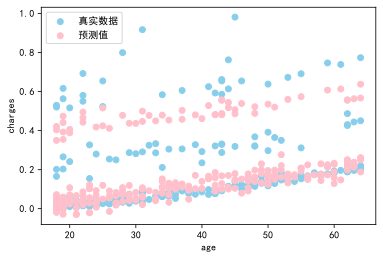

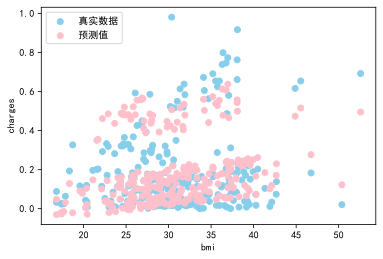

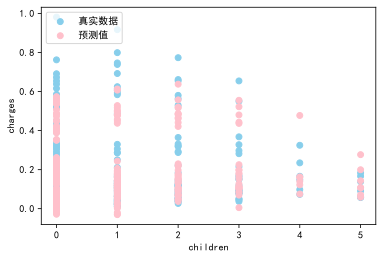

In [8]:
from sklearn import metrics
y_hat = model.predict(x_test)
print('RMSE为：',np.sqrt(metrics.mean_squared_error(y_hat,y_test)))
name=['age','bmi','children']
for i in range(len(name)):
    x_=x_test[name[i]]
    plt.scatter(x_,y_test,c='skyblue')
    plt.scatter(x_,y_hat,c='pink')
    plt.xlabel(name[i])
    plt.ylabel('charges')
    plt.legend(labels=['真实数据','预测值'],loc='upper left')
    plt.show()

Forward Pass
---------------------------------------------------------------
iter  parent  var  knot  mse       terms  gcv    rsq    grsq   
---------------------------------------------------------------
0     -       -    -     0.053054  1      0.054  0.000  0.000  
1     0       0    58    0.034540  3      0.038  0.349  0.297  
2     0       0    95    0.022421  5      0.027  0.577  0.505  
3     0       0    16    0.016234  7      0.021  0.694  0.611  
4     0       0    107   0.015295  9      0.022  0.712  0.600  
5     0       0    63    0.013456  11     0.021  0.746  0.614  
6     0       0    88    0.012299  13     0.021  0.768  0.612  
7     0       0    -1    0.012299  14     0.022  0.768  0.592  
---------------------------------------------------------------
Stopping Condition 2: Improvement below threshold

Pruning Pass
--------------------------------------------
iter  bf  terms  mse   gcv    rsq    grsq   
--------------------------------------------
0     -   14     0.0

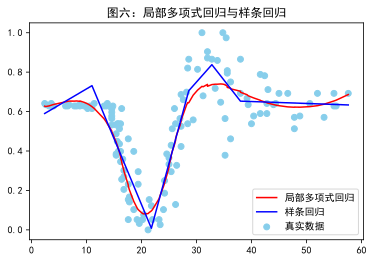

局部多项式回归的RMSE为： 0.10959276682861045
样条回归的RMSE为： 0.11105629575281897


In [9]:
#绘图六
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
max_min_scaler = lambda x : (x-np.min(x))/(np.max(x)-np.min(x))


df=pd.read_csv('mcycle.csv')
df['accel']=df[['accel']].apply(max_min_scaler)
x=df['times'].values
y=df['accel'].values
def local_polynomial_regression(y,x,width,sig):
    kernel=lambda x,c,sig: np.exp(-(x-x[c])**2/(2*(sig**2)))/(np.sqrt(2*np.pi)*sig) #高斯核
    for i in range(len(x)):
        #取得范围内的x,y
        x_window=x[max(0,i-width):min(len(x),i+width)]
        y_window=y[max(0,i-width):min(len(x),i+width)]
        weight=kernel(x,i,sig)#核加权
        weight_window=weight[max(0,i-width):min(len(x),i+width)]
        W=np.diag(weight_window)#将权重转化为斜对角矩阵
        
        #加权最小二乘法寻找最佳参数
        design_matrix=np.asmatrix(np.ones(len(x_window))).T #初始化
        for k in range(1,3):
            arr=np.asmatrix(np.power(x_window,k)).T #x^n的值
            design_matrix=np.concatenate((design_matrix,arr),axis=1)    
        coef=np.asarray((design_matrix.T*W*design_matrix).I*(design_matrix.T*W*(np.asmatrix(y_window).T)))#最小二乘估算系数
        
        y[i]=coef[2]*x[i]*x[i]+coef[1]*x[i]+coef[0] #多项式为ax^2+b^x+c，用最小二乘获得的最佳系数来计算新的y
    return y 
y=local_polynomial_regression(y,x,20,15)
y=local_polynomial_regression(y,x,20,15) #做两次对过拟合状态有很好的缓解
df=pd.read_csv('mcycle.csv')
df['accel']=df[['accel']].apply(max_min_scaler)
y_true=df['accel']
plt.scatter(df['times'].values,df['accel'].values,c='skyblue')
plt.plot(x,y,c='red')
rmse_1=np.sqrt(metrics.mean_squared_error(y_true,y))

from sklearn import metrics
df=pd.read_csv('mcycle.csv')
df['accel']=df[['accel']].apply(max_min_scaler)
y_true=df['accel'].values


df=pd.read_csv('mcycle.csv')
df['accel']=df[['accel']].apply(max_min_scaler)
x=df['times'].values
y=df['accel'].values
#http://contrib.scikit-learn.org/py-earth/
import numpy
from pyearth import Earth
from matplotlib import pyplot

model = Earth()
model.fit(x,y)
#Print the model
print(model.trace())
print(model.summary())
y_hat = model.predict(x)
plt.plot(x,y_hat,c='blue')
plt.legend(labels=['局部多项式回归','样条回归','真实数据'],loc='lower right')
plt.title('图六：局部多项式回归与样条回归')
plt.show()
print('局部多项式回归的RMSE为：',rmse_1)
print('样条回归的RMSE为：',np.sqrt(metrics.mean_squared_error(y,y_hat)))